In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# #######################################
# ### Generic gradient checker
# def generic_gradient_checker(X, y, theta, objective_func, gradient_func, 
#                              epsilon=0.01, tolerance=1e-4):
#     """
#     The functions takes objective_func and gradient_func as parameters. 
#     And check whether gradient_func(X, y, theta) returned the true 
#     gradient for objective_func(X, y, theta).
#     Eg: In LSR, the objective_func = compute_square_loss, and gradient_func = compute_square_loss_gradient
#     """
#     #TODO

#######################################
### The gradient of regularized batch gradient descent
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized average square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    #TODO


#######################################
### Regularized batch gradient descent
def regularized_grad_descent(X, y, alpha=0.05, lambda_reg=10**-2, num_step=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        num_step - number of steps to run
    
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size(num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step(num_step+1) is theta_hist[-1]
        loss hist - the history of average square loss function without the regularization term, 1D numpy array.
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    #TODO



#######################################
### Stochastic gradient descent
def stochastic_grad_descent(X, y, alpha=0.01, lambda_reg=10**-2, num_epoch=1000, eta0=False):
    """
    In this question you will implement stochastic gradient descent with regularization term

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - string or float, step size in gradient descent
                NOTE: In SGD, it's not a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every step is the float.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t).
                if alpha == "1/t", alpha = 1/t.
        lambda_reg - the regularization coefficient
        num_epoch - number of epochs to go through the whole training set

    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size(num_epoch, num_instances, num_features)
                     for instance, theta in epoch 0 should be theta_hist[0], theta in epoch(num_epoch) is theta_hist[-1]
        loss hist - the history of loss function vector, 2D numpy array of size(num_epoch, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta

    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    #TODO


def load_data():
    #Loading the dataset
    print('loading the dataset')

    df = pd.read_csv('ridge_regression_dataset.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=10)
    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    return X_train, y_train, X_test, y_test



### Problem 4

In [3]:
#######################################
### Feature normalization
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size(num_instances, num_features)
        test - test set, a 2D numpy array of size(num_instances, num_features)

    Returns:
        train_normalized - training set after normalization
        test_normalized - test set after normalization
    """
    #Initialize return variables
    train_normalized, test_normalized = [] , []
    #Iterate over 2D array 
    for d in range(train.shape[1]):
        #Grab subsets
        train_temp = train[:,d]
        test_temp = test[:,d]
        train_min = train_temp.min()
        train_max = train_temp.max()
        #If the column is not filled with constants, we want to include them
        if len(np.unique(train_temp)) > 1:
            #Grab the columns, transform, and append to list (implicitly making them rows)
            train_normalized.append((train_temp - train_min) / (train_max - train_min))
            test_normalized.append((test_temp - train_min) / (train_max - train_min))
            
    #Reformat data type to np.array and Transpose so rows become columns
    train_normalized, test_normalized = np.array(train_normalized).T, np.array(test_normalized).T  
    #Return values
    return train_normalized, train_normalized

In [4]:
x_train, y_train, x_test, y_test = load_data()

loading the dataset
Split into Train and Test
Scaling all to [0, 1]


### Problem 8

In [5]:
#######################################
### The square loss function
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D array of size(num_features)

    Returns:
        loss - the average square loss, scalar
    """
    #Count number of rows
    n = X.shape[0]
    #Calculate y hat
    y_hat = X @ theta
    #Calculate sum of squares
    sum_of_squares = sum((y_hat - y)**2)
    #Return our calculated loss
    loss = sum_of_squares/n
    return loss

### Problem 9

In [6]:
#######################################
### The gradient of the square loss function
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss(as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    #Calculate number of observations
    m = X.shape[0]
    #Calculate gradient using closed form solution from problem 6
    gradient = ((X.T @ X @ theta) - (X.T @ y)) * 2/m
    #Return gradient
    return gradient

In [7]:
compute_square_loss_gradient(x_train, y_train, np.random.rand(x_train.shape[1]))

array([28.91489956, 28.23401498, 27.54270698, 27.15547483, 26.79044229,
       26.2615001 , 25.22612043, 25.22612043, 23.99473634, 21.92232292,
       20.03426709, 18.99605077, 16.06064507, 13.86026622,  8.75229108,
        7.74316284,  5.47239969,  0.94539041, 25.52886483, 25.52886483,
       25.52886483, 23.65503091, 23.65503091, 23.65503091, 21.88679086,
       21.88679086, 21.88679086, 21.06638937, 21.06638937, 21.06638937,
       20.61085068, 20.61085068, 20.61085068, 12.95773737, 12.95773737,
       12.95773737, 15.76888545, 15.76888545, 15.76888545, 17.37278406,
       17.37278406, 17.37278406, 18.1013868 , 18.1013868 , 18.1013868 ,
       18.50126224, 18.50126224, 18.50126224, 29.11914246])

### Problem 10

In [8]:
#######################################
### Gradient checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm. Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
(e_1 =(1,0,0,...,0), e_2 =(0,1,0,...,0), ..., e_d =(0,...,0,1))

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
(J(theta + epsilon * e_i) - J(theta - epsilon * e_i)) /(2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicating whether the gradient is correct or not
    """
    ### Given Code:
    true_gradient = compute_square_loss_gradient(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
  
    ### My Code:
    #Generate helper variable, a vector filled with epsilons
    epsilon_vec = np.array([epsilon]*num_features)
    
    #Iterate d times, where d is the number of features
    for i in range(num_features):
        #Generate array of 0s
        e_i = np.zeros(num_features) 
        #Set the ith entry to 1
        e_i[i] = 1 
        #Compute Partial Derivative for ith entry
        partial = (compute_square_loss(X,y,theta+(e_i * epsilon)) - (compute_square_loss(X,y,theta-(e_i * epsilon)) )) / (2 * epsilon)
        #Write to our approx_grad array
        approx_grad[i] = partial
    #Calculate the Euclidean Norm of the difference in gradients
    difference = (sum((approx_grad - true_gradient)**2)) ** .5
    #Check if our approximation exceeded the tolerance level
    if difference > tolerance:
        return False #If the difference exceeds tolerance, return False
    else:
        return True #Otherwise our gradient works well, return True

In [9]:
grad_checker(x_train, y_train,np.random.rand(x_train.shape[1]))

True

### Problem 10

In [10]:
#######################################
### Batch gradient descent
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size(num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step(num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array,(num_step+1)
    """
    ### Given Code:
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step + 1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_step + 1)  #Initialize loss_hist
    theta = np.zeros(num_features)  #Initialize theta
    ### My Code:
    #theta = np.random.rand(num_features)
    #Iterate over gradient descent steps
    for i in range(num_step):
        #Compute Gradient and Calculate and Append Loss
        gradient = compute_square_loss_gradient(X,y,theta)
        loss_hist[i] = compute_square_loss(X,y,theta)

        #Calculate and write new theta
        theta = theta - (alpha * gradient)
        theta_hist[i,:] = theta
    loss_hist[-1] = compute_square_loss(X,y,theta)
    #Return theta_hist, loss_hist    
    return theta_hist, loss_hist

### Problem 11
Now let's experiment with the step size. Note that if the step size
is too large, gradient descent may not converge. Starting with a step-size of $0.1$, try various different fixed
step sizes to see which converges most quickly and/or which diverge.
As a minimum, try step sizes 0.5, 0.1, .05, and .01. Plot the average square loss on the training set as a function of the number of steps for
each step size. Briefly summarize your findings. 

In [11]:
#Calculate theta history and loss history for step size alpha = 0.1
theta_hist_0_1, loss_hist_0_1 = batch_grad_descent(x_train,y_train, alpha=.1)
#Calculate theta history and loss history for step size alpha = 0.5
theta_hist_0_5, loss_hist_0_5 = batch_grad_descent(x_train,y_train, alpha=.5)
#Calculate theta history and loss history for step size alpha = 0.01
theta_hist_0_0_1, loss_hist_0_0_1 = batch_grad_descent(x_train,y_train, alpha=.01)
#Calculate theta history and loss history for step size alpha = 0.05
theta_hist_0_0_5, loss_hist_0_0_5 = batch_grad_descent(x_train,y_train, alpha=.05)
#Calculate theta history and loss history for step size alpha = 0.06
theta_hist_0_0_6, loss_hist_0_0_6 = batch_grad_descent(x_train,y_train, alpha=.045)

Text(0.5, 1.0, 'Average Training Error For Various Alpha Step Size')

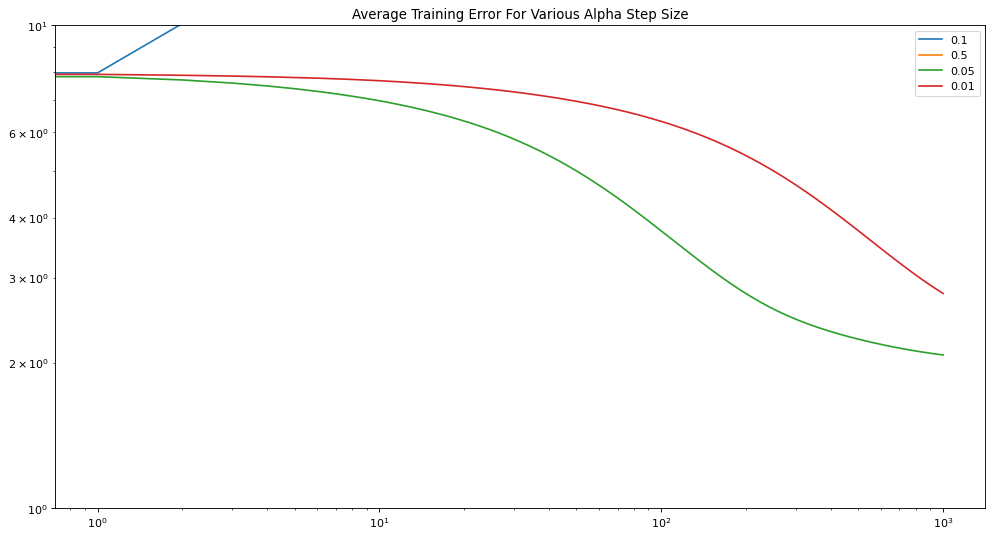

In [12]:
#Generate helper variable for x-axis
x = list(range(1001))
#Begin plotting
plt.figure(figsize=(15, 8), dpi=80)
plt.plot(x,loss_hist_0_1, label='0.1')
plt.plot(x,loss_hist_0_5, label='0.5')
plt.plot(x,loss_hist_0_0_5,label='0.05')
plt.plot(x,loss_hist_0_0_1,label='0.01')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title("Average Training Error For Various Alpha Step Size")

### It appears that step sizes .5 and .01 diverge to infinity, while step sizes .05 and .01 converge to ~2 and ~2.7 respectively.

### Problem 13

In [13]:
###Using step size alpha = .05 calculate average test loss as a functio of N iterations

#Initialize helper variables
N = 1000
average_test_loss = np.zeros(N)

#Iterate over 1000 steps
for step in range(N):
    #Calculate average test loss
    average_test_loss[step] = compute_square_loss(x_test,y_test,theta_hist_0_0_5[step])

Text(0.5, 1.0, 'Average Test Loss, Step Size Alpha = .05, Theta as a function of N ')

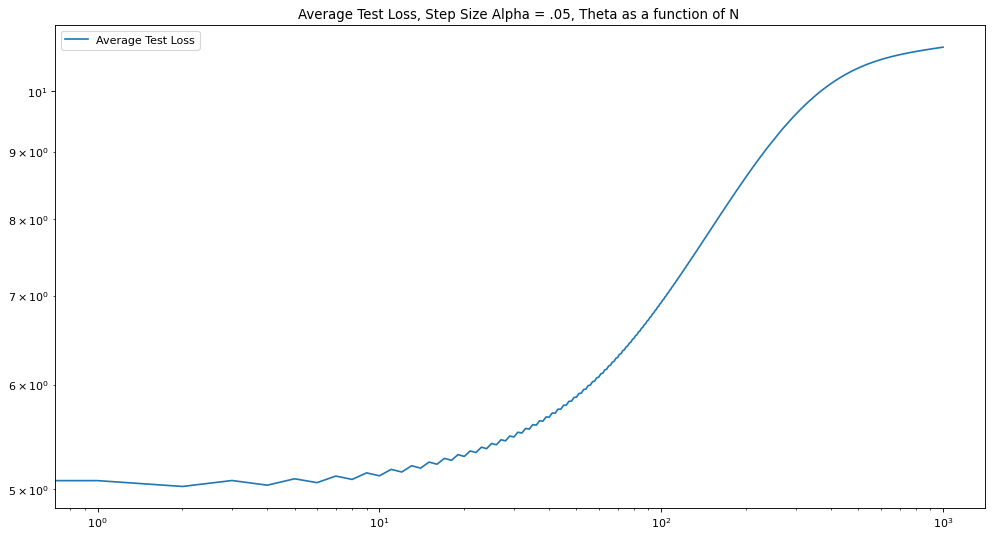

In [14]:
#Generate helper variable for x-axis
x = list(range(1000))
#Begin plotting
plt.figure(figsize=(15, 8), dpi=80)
plt.plot(x,average_test_loss, label='Average Test Loss')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title("Average Test Loss, Step Size Alpha = .05, Theta as a function of N ")